# Decision Tree

In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.pipeline import Pipeline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score, r2_score

import pandas as pd

import random

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
min_range = 0
max_range = 500

In [3]:
rand_int_min = -50
rand_int_max = 50

## Decision Tree Classification

In [4]:
# 3 columns
x = [[r+random.randint(rand_int_min, rand_int_max), r+random.randint(rand_int_min, rand_int_max), r+random.randint(rand_int_min, rand_int_max)] for r in range(min_range,max_range)]
x

[[6, -15, 49],
 [23, -39, -32],
 [52, -36, 19],
 [10, 16, -24],
 [44, 42, -15],
 [53, -11, -34],
 [-22, -36, -13],
 [36, 15, 55],
 [-21, 5, -3],
 [-26, -25, -23],
 [-28, 45, 17],
 [35, 13, -37],
 [-36, -36, -33],
 [21, -5, -17],
 [21, -26, 25],
 [-19, 43, 19],
 [57, 40, 4],
 [-21, 6, -26],
 [-31, 40, 33],
 [41, -30, -19],
 [60, 16, 21],
 [30, 2, 55],
 [53, 57, 42],
 [42, 48, 41],
 [21, 34, 58],
 [61, 18, 32],
 [43, 32, 64],
 [49, 72, 37],
 [59, 16, 10],
 [21, 56, -7],
 [-4, 59, -15],
 [-14, 14, 3],
 [-1, 18, -13],
 [10, 47, 2],
 [2, 3, 3],
 [79, -6, -13],
 [-1, 69, 58],
 [-11, 58, -4],
 [7, -8, 35],
 [28, 67, 81],
 [49, -4, 40],
 [10, 23, 9],
 [34, 83, -5],
 [70, 4, 22],
 [29, 54, 22],
 [60, 25, 42],
 [5, 4, 72],
 [96, 10, 80],
 [97, 53, 34],
 [41, 35, 23],
 [74, 71, 95],
 [12, 68, 39],
 [78, 53, 2],
 [100, 50, 37],
 [56, 24, 34],
 [40, 34, 84],
 [58, 9, 45],
 [105, 97, 41],
 [97, 83, 58],
 [101, 79, 29],
 [49, 35, 54],
 [13, 27, 77],
 [26, 68, 33],
 [107, 17, 72],
 [59, 94, 83],
 [71,

In [5]:
y = [random.randint(0, 1) for r in range(min_range,max_range)]
y

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,


In [6]:
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x, y, train_size=.7, test_size=.3)

In [7]:
dt_cls = DecisionTreeClassifier()

In [8]:
dt_fit = dt_cls.fit(x_train_clf,y_train_clf)
dt_fit

DecisionTreeClassifier()

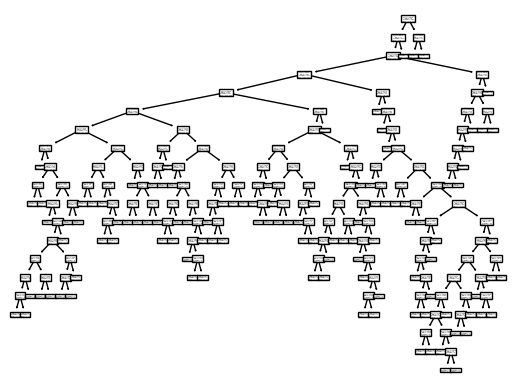

In [9]:
tree.plot_tree(dt_fit);

In [10]:
dt_clf_pred = dt_cls.predict(x_test_clf)

In [11]:
mean_squared_error(y_test_clf, dt_clf_pred)

0.4266666666666667

In [12]:
mean_absolute_error(y_test_clf, dt_clf_pred)

0.4266666666666667

In [13]:
accuracy_score(y_test_clf, dt_clf_pred)

0.5733333333333334

In [14]:
cr = classification_report(y_test_clf, dt_clf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.51      0.54        75
           1       0.56      0.64      0.60        75

    accuracy                           0.57       150
   macro avg       0.57      0.57      0.57       150
weighted avg       0.57      0.57      0.57       150



## Decision Tree Regressor

In [15]:
# 3 columns
x = [[r+random.randint(rand_int_min, rand_int_max), r+random.randint(rand_int_min, rand_int_max), r+random.randint(rand_int_min, rand_int_max)] for r in range(min_range,max_range)]
x

[[-25, 11, 3],
 [-47, 12, 21],
 [-3, 31, -32],
 [-42, -13, -32],
 [-8, -44, -42],
 [49, 44, 34],
 [-6, -12, -39],
 [33, 14, 8],
 [4, 4, 19],
 [-10, -7, 15],
 [-24, -24, 1],
 [43, 46, 48],
 [58, 49, 36],
 [34, 11, 41],
 [-27, 19, 47],
 [-16, -6, 40],
 [29, 62, -7],
 [-25, 55, 9],
 [58, 19, -27],
 [49, 24, 22],
 [-1, -7, -27],
 [31, 41, 18],
 [66, 45, -4],
 [73, -17, 60],
 [0, 50, 39],
 [17, -19, 12],
 [62, -4, 63],
 [5, -5, 34],
 [27, 33, -20],
 [24, -17, 79],
 [76, 63, 11],
 [20, 21, 16],
 [6, 19, 22],
 [7, 83, 52],
 [70, 42, 72],
 [31, 66, -8],
 [64, -10, 1],
 [29, 13, 57],
 [30, 67, 87],
 [49, 44, 62],
 [14, 56, 18],
 [51, 89, 82],
 [-1, 2, 52],
 [78, 55, 47],
 [83, 20, 20],
 [31, 75, 6],
 [35, 62, 23],
 [59, 7, 33],
 [85, 43, 17],
 [51, 29, 5],
 [52, 7, 11],
 [33, 52, 42],
 [18, 96, 8],
 [69, 43, 101],
 [7, 35, 17],
 [68, 89, 40],
 [13, 25, 101],
 [96, 88, 105],
 [54, 35, 107],
 [109, 101, 93],
 [11, 42, 15],
 [39, 68, 21],
 [29, 86, 59],
 [62, 92, 80],
 [36, 74, 27],
 [101, 99, 44]

In [16]:
y = [r+random.randint(rand_int_min, rand_int_max) for r in range(min_range,max_range)]
y

[-29,
 37,
 7,
 17,
 -9,
 51,
 23,
 25,
 21,
 -41,
 60,
 0,
 -2,
 21,
 31,
 19,
 43,
 35,
 65,
 32,
 1,
 63,
 42,
 3,
 53,
 40,
 36,
 41,
 27,
 -20,
 11,
 52,
 37,
 81,
 21,
 26,
 85,
 37,
 17,
 73,
 -4,
 46,
 85,
 52,
 50,
 9,
 26,
 39,
 90,
 62,
 53,
 37,
 29,
 59,
 18,
 8,
 76,
 105,
 18,
 35,
 102,
 106,
 66,
 92,
 110,
 58,
 64,
 51,
 80,
 68,
 83,
 29,
 43,
 65,
 47,
 114,
 39,
 57,
 44,
 92,
 121,
 105,
 125,
 78,
 75,
 121,
 133,
 105,
 98,
 41,
 44,
 48,
 82,
 48,
 66,
 126,
 87,
 122,
 66,
 146,
 83,
 80,
 121,
 122,
 99,
 64,
 145,
 117,
 83,
 82,
 106,
 145,
 77,
 157,
 74,
 161,
 110,
 128,
 121,
 123,
 73,
 160,
 149,
 96,
 89,
 85,
 94,
 88,
 141,
 91,
 106,
 140,
 137,
 91,
 115,
 144,
 93,
 145,
 122,
 135,
 148,
 187,
 144,
 101,
 122,
 145,
 196,
 196,
 133,
 147,
 112,
 147,
 189,
 139,
 195,
 181,
 139,
 189,
 149,
 172,
 161,
 145,
 195,
 184,
 123,
 193,
 206,
 139,
 154,
 200,
 155,
 171,
 217,
 170,
 189,
 147,
 204,
 141,
 224,
 221,
 190,
 158,
 132,
 202,
 1

In [17]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, train_size=.7, test_size=.3)

In [18]:
dt_reg = DecisionTreeRegressor()

In [19]:
dt_reg.fit(x_train_reg, y_train_reg)

DecisionTreeRegressor()

In [20]:
dt_reg_pred = dt_reg.predict(x_test_reg)

In [21]:
mean_squared_error(y_test_reg, dt_reg_pred)

2691.2733333333335

In [22]:
mean_absolute_error(y_test_reg, dt_reg_pred)

41.62

In [23]:
r2_score(y_test_reg, dt_reg_pred)

0.8757739666748497

## Decision Tree Pipeline

### Decision Tree Classification Pipeline

In [24]:
dt_clf_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier())
])

In [25]:
dt_clf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'dt', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__random_state', 'dt__splitter'])

In [26]:
dt_clf_param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [5, 10, 15],
    'dt__max_features': [1,2,3],
    'dt__max_leaf_nodes': [10, 20, 50],
    'dt__min_samples_leaf': [5,10,25],
    'dt__random_state': [1, 25, 42]
}

In [27]:
dt_clf_random_search = RandomizedSearchCV(dt_clf_pipeline, dt_clf_param_grid)

In [28]:
dt_clf_random_search.fit(x_train_clf, y_train_clf)

RandomizedSearchCV(estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': [5, 10, 15],
                                        'dt__max_features': [1, 2, 3],
                                        'dt__max_leaf_nodes': [10, 20, 50],
                                        'dt__min_samples_leaf': [5, 10, 25],
                                        'dt__random_state': [1, 25, 42]})

In [29]:
dt_clf_random_search.best_params_

{'dt__random_state': 1,
 'dt__min_samples_leaf': 25,
 'dt__max_leaf_nodes': 20,
 'dt__max_features': 1,
 'dt__max_depth': 10,
 'dt__criterion': 'entropy'}

In [30]:
dt_clf_rand_search_pred = dt_clf_random_search.predict(x_test_clf)

In [31]:
mean_squared_error(y_test_clf, dt_clf_rand_search_pred)

0.49333333333333335

In [32]:
mean_absolute_error(y_test_clf, dt_clf_rand_search_pred)

0.49333333333333335

In [33]:
accuracy_score(y_test_clf, dt_clf_rand_search_pred)

0.5066666666666667

In [34]:
cr = classification_report(y_test_clf, dt_clf_rand_search_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.51      0.43      0.46        75
           1       0.51      0.59      0.54        75

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.50       150
weighted avg       0.51      0.51      0.50       150



### Decision Tree Regression Pipeline

In [35]:
dt_reg_pipeline = Pipeline([
    ('dt', DecisionTreeRegressor())
])

In [36]:
dt_reg_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'dt', 'dt__ccp_alpha', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__random_state', 'dt__splitter'])

In [37]:
dt_reg_param_grid = {
    'dt__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'dt__max_depth': [5, 10, 15],
    'dt__max_features': [1,2,3],
    'dt__max_leaf_nodes': [10, 20, 50],
    'dt__min_samples_leaf': [5,10,25],
    'dt__random_state': [1, 25, 42],
}

In [38]:
dt_reg_random_search = RandomizedSearchCV(dt_reg_pipeline, dt_reg_param_grid)

In [39]:
dt_reg_random_search.fit(x_train_reg, y_train_reg)

RandomizedSearchCV(estimator=Pipeline(steps=[('dt', DecisionTreeRegressor())]),
                   param_distributions={'dt__criterion': ['squared_error',
                                                          'friedman_mse',
                                                          'absolute_error'],
                                        'dt__max_depth': [5, 10, 15],
                                        'dt__max_features': [1, 2, 3],
                                        'dt__max_leaf_nodes': [10, 20, 50],
                                        'dt__min_samples_leaf': [5, 10, 25],
                                        'dt__random_state': [1, 25, 42]})

In [40]:
dt_reg_random_search.best_params_

{'dt__random_state': 1,
 'dt__min_samples_leaf': 5,
 'dt__max_leaf_nodes': 20,
 'dt__max_features': 3,
 'dt__max_depth': 10,
 'dt__criterion': 'squared_error'}

In [41]:
dt_reg_rand_search_pred = dt_reg_random_search.predict(x_test_reg)

In [42]:
mean_squared_error(y_test_reg, dt_reg_rand_search_pred)

1675.0875402033123

In [43]:
mean_absolute_error(y_test_reg, dt_reg_rand_search_pred)

32.75600265260342

In [44]:
r2_score(y_test_reg, dt_reg_rand_search_pred)

0.9226799158545123